In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import pandas_datareader as web 
import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

#relax the display limits on columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('index_training.csv')

In [3]:
df.head(2)

Index        Date         Open         High          Low        Close  \
0   HSI  1986-12-31  2568.300049  2568.300049  2568.300049  2568.300049   
1   HSI  1987-01-02  2540.100098  2540.100098  2540.100098  2540.100098   

     Adj Close  Volume    CloseUSD  
0  2568.300049     0.0  333.879006  
1  2540.100098     0.0  330.213013

In [4]:
df = df[['Date', 'Close']]

In [5]:
df.head(5)

Date        Close
0  1986-12-31  2568.300049
1  1987-01-02  2540.100098
2  1987-01-05  2552.399902
3  1987-01-06  2583.899902
4  1987-01-07  2607.100098

In [6]:
df.shape

(104224, 2)

In [7]:
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [8]:
# convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    104224 non-null  datetime64[ns]
 1   Close   104224 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 MB


In [10]:
df['Month']= df["Date"].dt.month

In [11]:
df['Year']= df["Date"].dt.year

In [12]:
df.head(2)

Date        Close  Month  Year
0 1986-12-31  2568.300049     12  1986
1 1987-01-02  2540.100098      1  1987

In [13]:
df.shape

(104224, 4)

In [14]:
df.dtypes

Date     datetime64[ns]
Close           float64
Month             int64
Year              int64
dtype: object

In [15]:
df["Year"] = pd.to_datetime(df['Year'])

In [16]:
df.dtypes

Date     datetime64[ns]
Close           float64
Month             int64
Year     datetime64[ns]
dtype: object

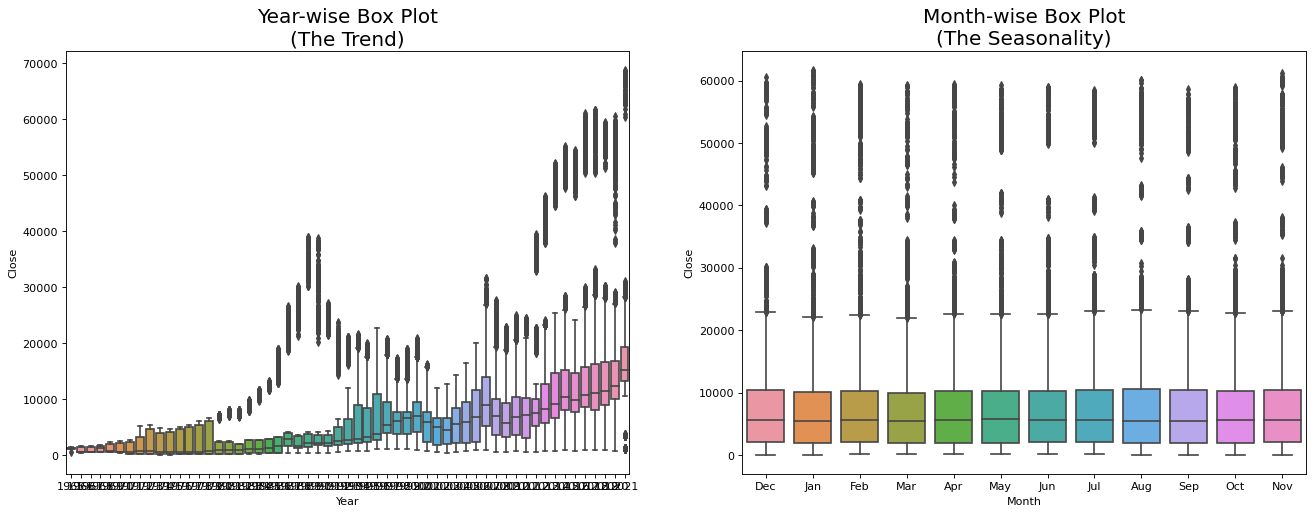

In [17]:
# Prepare data
df['Year'] = [d.year for d in df.Date]
df['Month'] = [d.strftime('%b') for d in df.Date]
Years = df['Year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Close', data=df, ax=axes[0])
sns.boxplot(x='Month', y='Close', data=df.loc[~df.Year.isin([2010, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [18]:
# setting first name as index column
df.set_index("Date", inplace = True)
 
# display
df.head(2)

Close Month  Year
Date                               
1986-12-31  2568.300049   Dec  1986
1987-01-02  2540.100098   Jan  1987

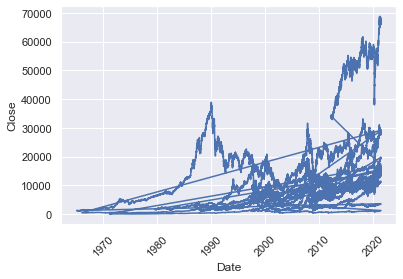

In [19]:
sns.set()
plt.ylabel('Close')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df.index, df['Close'], )
plt.show()

In [20]:
df.index

DatetimeIndex(['1986-12-31', '1987-01-02', '1987-01-05', '1987-01-06',
               '1987-01-07', '1987-01-08', '1987-01-09', '1987-01-12',
               '1987-01-13', '1987-01-14',
               ...
               '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
               '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27',
               '2021-05-28', '2021-05-31'],
              dtype='datetime64[ns]', name='Date', length=104224, freq=None)

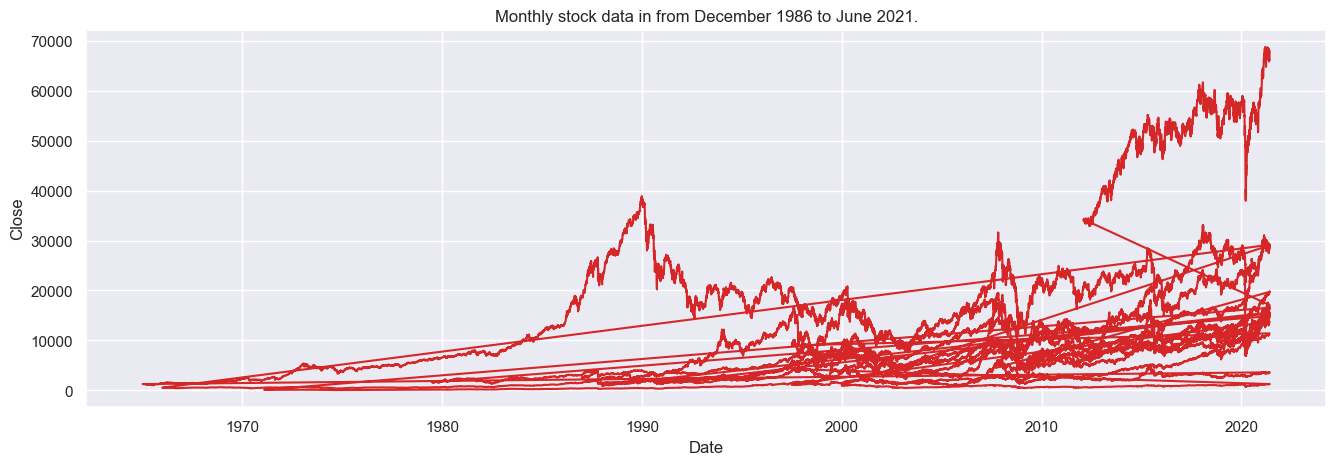

In [21]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Close', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.Close, title='Monthly stock data in from December 1986 to June 2021.')  

In [22]:
df= df.drop(['Month','Year'], axis=1)

In [23]:
training= df['1990-01-02' :'2018-12-31']
testing = df['2019-01-02':'2021-05-31']
testing

Close
Date                    
2019-01-02  25130.349610
2019-01-03  25064.359380
2019-01-04  25626.029300
2019-01-07  25835.699220
2019-01-08  25875.449220
2019-01-09  26462.320310
2019-01-10  26521.429690
2019-01-11  26667.269530
2019-01-14  26298.330080
2019-01-15  26830.289060
2019-01-16  26902.099610
2019-01-17  26755.630860
2019-01-18  27090.810550
2019-01-21  27196.539060
2019-01-22  27005.449220
2019-01-23  27008.199220
2019-01-24  27120.980470
2019-01-25  27569.189450
2019-01-28  27576.960940
2019-01-29  27531.679690
2019-01-30  27642.849610
2019-01-31  27942.470700
2019-02-01  27930.740230
2019-02-04  27990.210940
2019-02-08  27946.320310
2019-02-11  28143.839840
2019-02-12  28171.330080
2019-02-13  28497.589840
2019-02-14  28432.050780
2019-02-15  27900.839840
2019-02-18  28347.009770
2019-02-19  28228.130860
2019-02-20  28514.050780
2019-02-21  28629.919920
2019-02-22  28816.300780
2019-02-25  28959.300780
2019-02-26  28772.060550
2019-02-27  28757.439450
2019-02-28  28633.179690
2019-03-01  28812.169920
2019-03-04  28959.589840
2019-03-05  28961.599610
2019-03-06  29037.599610
2019-03-07  28779.449220
2019-03-08  28228.419920
2019-03-11  28503.300780
2019-03-12  28920.869140
2019-03-13  28807.449220
2019-03-14  28851.390630
2019-03-15  29012.259770
2019-03-18  29409.009770
2019-03-19  29466.279300
2019-03-20  29320.970700
2019-03-21  29071.560550
2019-03-22  29113.359380
2019-03-25  28523.349610
2019-03-26  28566.910160
2019-03-27  28728.250000
2019-03-28  28775.210940
2019-03-29  29051.359380
2019-04-01  29562.019530
2019-04-02  29624.669920
2019-04-03  29986.390630
2019-04-04  29936.320310
2019-04-08  30077.150390
2019-04-09  30157.490230
2019-04-10  30119.560550
2019-04-11  29839.449220
2019-04-12  29909.759770
2019-04-15  29810.720700
2019-04-16  30129.869140
2019-04-17  30124.679690
2019-04-18  29963.259770
2019-04-23  29963.240230
2019-04-24  29805.830080
2019-04-25  29549.800780
2019-04-26  29605.009770
2019-04-29  29892.810550
2019-04-30  29699.109380
2019-05-02  29944.179690
2019-05-03  30081.550780
2019-05-06  29209.820310
2019-05-07  29363.019530
2019-05-08  29003.199220
2019-05-09  28311.070310
2019-05-10  28550.240230
2019-05-14  28122.019530
2019-05-15  28268.710940
2019-05-16  28275.070310
2019-05-17  27946.460940
2019-05-20  27787.609380
2019-05-21  27657.240230
2019-05-22  27705.939450
2019-05-23  27267.130860
2019-05-24  27353.929690
2019-05-27  27288.089840
2019-05-28  27390.810550
2019-05-29  27235.710940
2019-05-30  27114.880860
2019-05-31  26901.089840
2019-06-03  26893.859380
2019-06-04  26761.519530
2019-06-05  26895.439450
2019-06-06  26965.279300
2019-06-10  27578.640630
2019-06-11  27789.339840
2019-06-12  27308.460940
2019-06-13  27294.710940
2019-06-14  27118.349610
2019-06-17  27227.160160
2019-06-18  27498.769530
2019-06-19  28202.140630
2019-06-20  28550.429690
2019-06-21  28473.710940
2019-06-24  28513.000000
2019-06-25  28185.980470
2019-06-26  28221.980470
2019-06-27  28621.419920
2019-06-28  28542.619140
2019-07-02  28875.560550
2019-07-03  28855.140630
2019-07-04  28795.769530
2019-07-05  28774.830080
2019-07-08  28331.689450
2019-07-09  28116.279300
2019-07-10  28204.689450
2019-07-11  28431.800780
2019-07-12  28471.619140
2019-07-15  28554.880860
2019-07-16  28619.619140
2019-07-17  28593.169920
2019-07-18  28461.660160
2019-07-19  28765.400390
2019-07-22  28371.259770
2019-07-23  28466.480470
2019-07-24  28524.039060
2019-07-25  28594.300780
2019-07-26  28397.740230
2019-07-29  28106.410160
2019-07-30  28146.500000
2019-07-31  27777.750000
2019-08-01  27565.699220
2019-08-02  26918.580080
2019-08-05  26151.320310
2019-08-06  25976.240230
2019-08-07  25997.029300
2019-08-08  26120.769530
2019-08-09  25939.300780
2019-08-12  25824.720700
2019-08-13  25281.300780
2019-08-14  25302.279300
2019-08-15  25495.460940
2019-08-16  25734.220700
2019-08-19  26291.839840
2019-08-20  26231.539060
2019-08-21  26270.039060
2019-08-22  26048.720700
2019-08-23  26179.330080
2019-08-26  25680.3

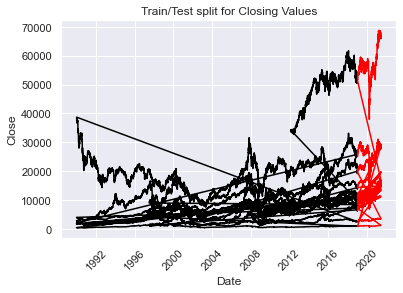

In [24]:
plt.plot(training, color = "black", label = 'Training')
plt.plot(testing, color = "red", label = 'Testing')
plt.ylabel('Close')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Closing Values")
plt.show()

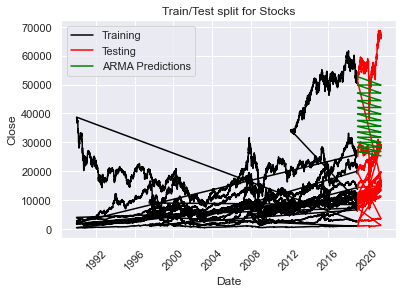

In [25]:
y = training['Close']

ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(testing.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], 
                                             end = y_pred_df.index[-1])
y_pred_df.index = testing.index
y_pred_outARMA = y_pred_df["Predictions"] 

plt.plot(training, color = "black", label = 'Training')
plt.plot(testing, color = "red", label = 'Testing')
plt.ylabel('Close')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Stocks")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.legend()
plt.show()

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(testing["Close"].values, y_pred_df["Predictions"]))
print("ARMA RMSE: ",arma_rmse)

ARMA RMSE:  27539.136750060352


In [27]:
ARIMAmodel = SARIMAX(y, order = (2, 2, 2))
#ARIMAmodel = SARIMAX(y, order = (2, 3, 2))
#ARIMAmodel = SARIMAX(y, order = (0,0,1))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(testing.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0],
                                              end = y_pred_df.index[-1])
y_pred_df.index = testing.index
y_pred_outARIMA = y_pred_df["Predictions"]

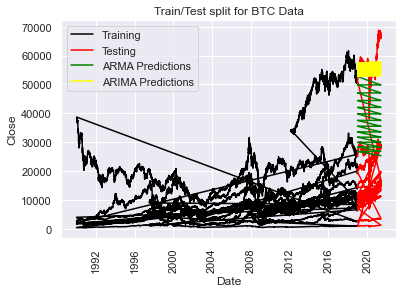

In [28]:
plt.plot(training, color = "black", label = 'Training')
plt.plot(testing, color = "red", label = 'Testing')
plt.ylabel('Close')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.legend()
plt.show()

In [29]:
arma_rmse = np.sqrt(mean_squared_error(testing["Close"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ",arma_rmse)

ARIMA RMSE:  41428.59867334628


In [30]:
SARIMAXmodel = SARIMAX(y, order = (1,1,1), seasonal_order=(1,1,1,12),enforce_stationarity=False)
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(testing.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0],
                                                end = y_pred_df.index[-1])
y_pred_df.index = testing.index
y_pred_outSARIMAX = y_pred_df["Predictions"] 

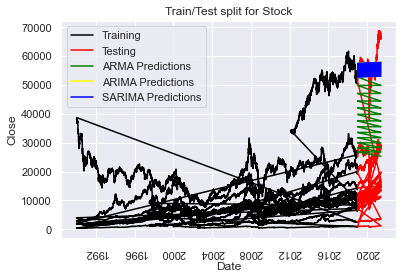

In [31]:
plt.plot(training, color = "black", label = 'Training')
plt.plot(testing, color = "red", label = 'Testing')
plt.ylabel('Close')
plt.xlabel('Date')
plt.xticks(rotation=180)
plt.title("Train/Test split for Stock")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_outSARIMAX, color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.show()

In [32]:
arma_rmse = np.sqrt(mean_squared_error(testing["Close"].values, y_pred_df["Predictions"]))
print("SARIMA RMSE: ",arma_rmse)

SARIMA RMSE:  41394.098160273425
